# Deep Neural Networks - Image Classification 

### Summary of CNN

Convolution - Add feature ditector to get feature map by getting it sharpened, blur etc. 

Relu - remove the negetives and increase the non-linearity

pooling - Reduce dimentionality (max, mean, sum), stride =2,3

flattening - insert the data into an ANN

### How to improve the performance of the NN

Adding more feature detectors

Dropouts - dropping out units in a NN, this is a regularization technique for reducing overfitting, it will reduce the co-dependency among the nerons, so network would be able to genralize

Confusion matrix - TP (True Positive), TN (True Negetive), FP (False positive: Type I), FN (False Negetive: Type II) 

Classification Accuracy = (TP+TN)/(TP+TN+FP+FN)

Misclassification Rate (Error Rate) = (FP + FN)/(TP+TN+FP+FN)

Precision = TP/(TP+FP) : When model predicted True class, how often it is right

Recall = TP/(TP+FN) : When the class is actually true, how often did the classifier get it right

### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

### Visualize the Data

Deer


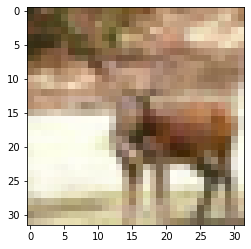

In [7]:
i = 1001

plt.imshow(X_train[i])
#print(y_train[i])

classes = np.array(['Airplanes','Cars','Birds','Cats','Deer','Dogs','Frogs','Horses','Ships','Trucks'])
print (' '.join(map(str,classes[y_train[i]])))

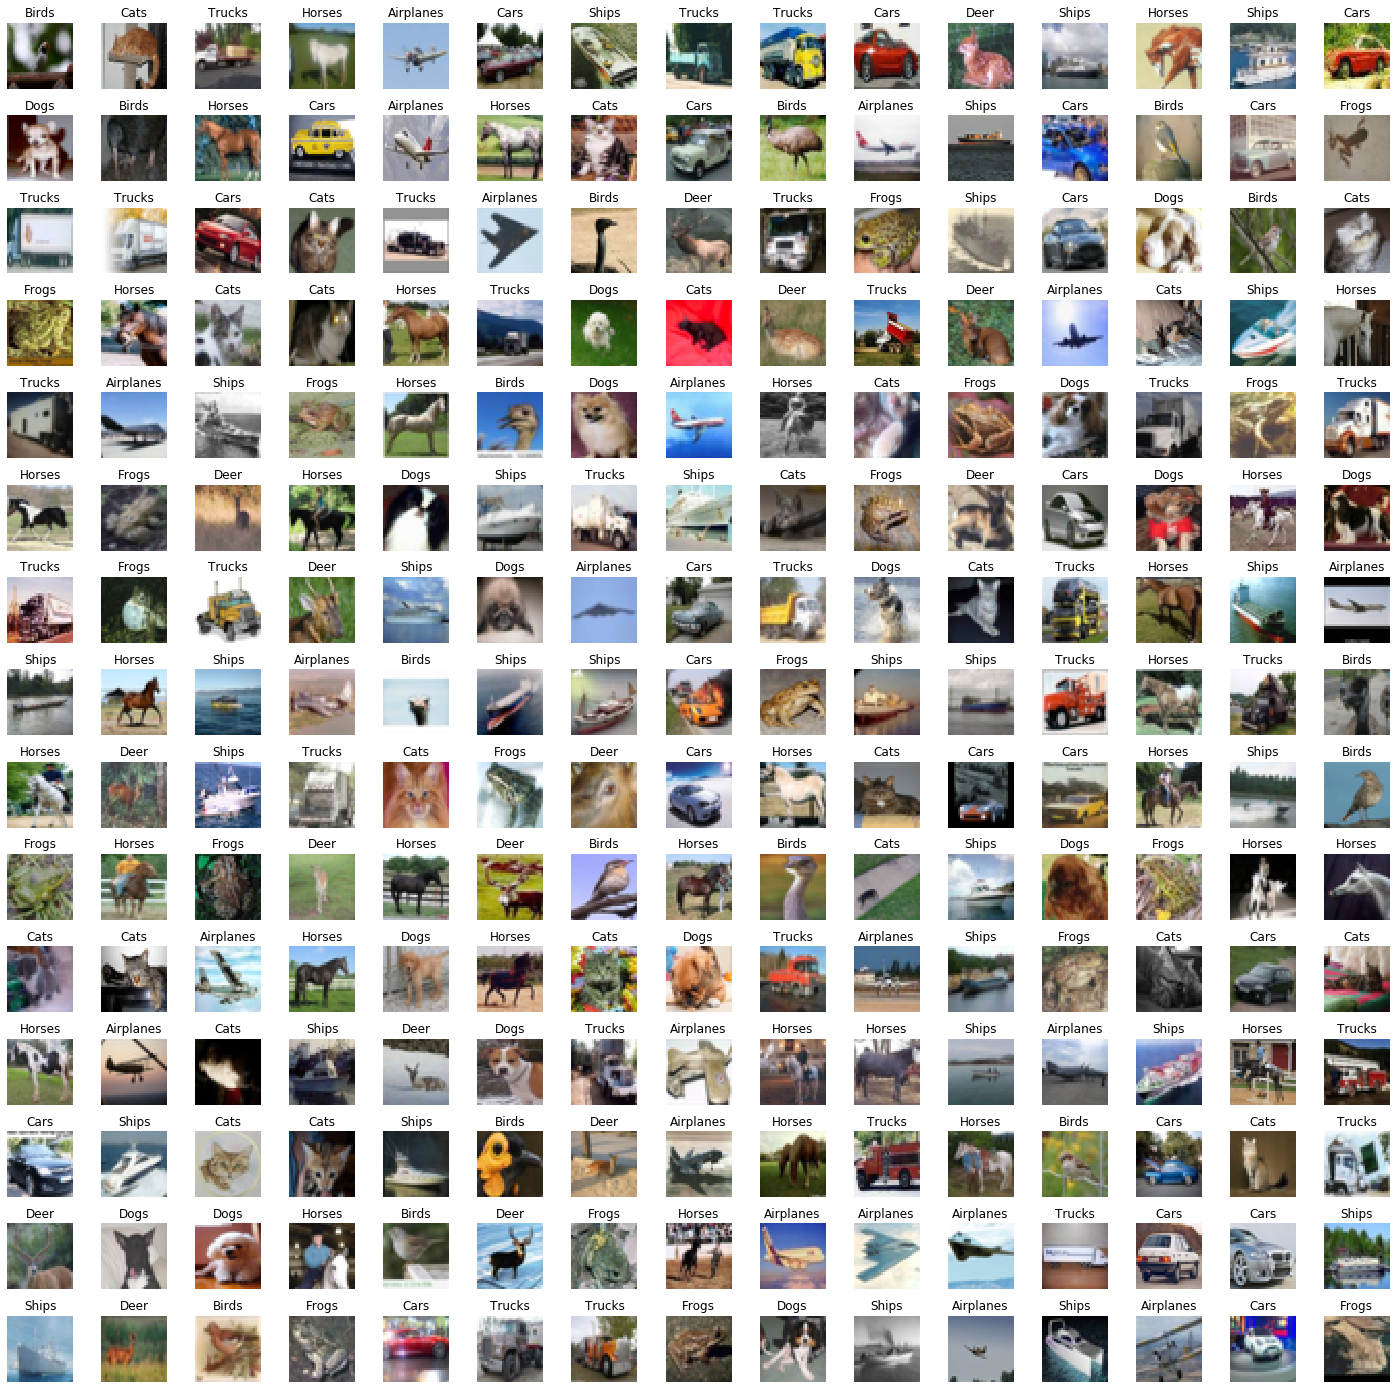

In [8]:
W_grid = 15
L_grid = 15

classes = np.array(['Airplanes','Cars','Birds','Cats','Deer','Dogs','Frogs','Horses','Ships','Trucks'])

fig, axes = plt.subplots(L_grid,W_grid,figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)



for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(' '.join(map(str,classes[y_train[index]])))
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

### Data preprocessing

In [9]:
# convert the images in to float32 type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
number_cat = 10

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
import keras
y_train = keras.utils.to_categorical(y_train,number_cat)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_test = keras.utils.to_categorical(y_test,number_cat)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

#### Data nomalization

In [14]:
X_train = X_train/255
X_test = X_test/255
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [15]:
#ge the dimention of the images
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

### Model Building

In [16]:
from keras.models import Sequential # build the model in a sequantial way
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout # different layers we are going to use
from keras.optimizers import Adam #optimizer
from keras.callbacks import TensorBoard

In [17]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4)) #30% of the neurons will be dropped along with the weights

cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4)) #20% of the neurons will be dropped along with the weights

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax')) # output has to be 0,1 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [18]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)        

### Model Training

In [19]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ['accuracy'])
#root mean square error: rmsprop, lr: learning rate

In [20]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 1, shuffle = True)


Epoch 1/1
50000/50000 [==============================] - 214s 4ms/step - loss: 1.6086 - accuracy: 0.4192


### Evaluate the Model

In [21]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 15s 2ms/step
Test Accuracy: 0.5810999870300293


In [23]:
# Doing predictions
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes 

array([3, 1, 1, ..., 5, 1, 7], dtype=int64)

In [24]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

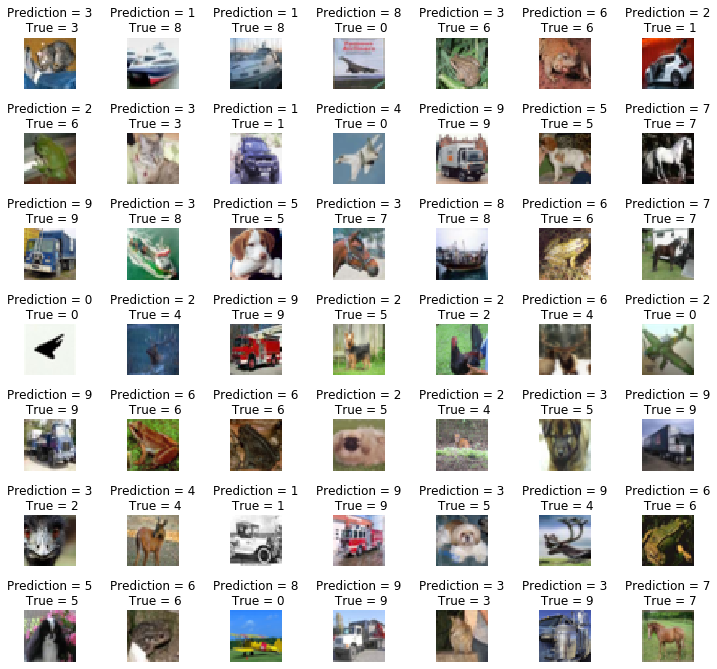

In [25]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

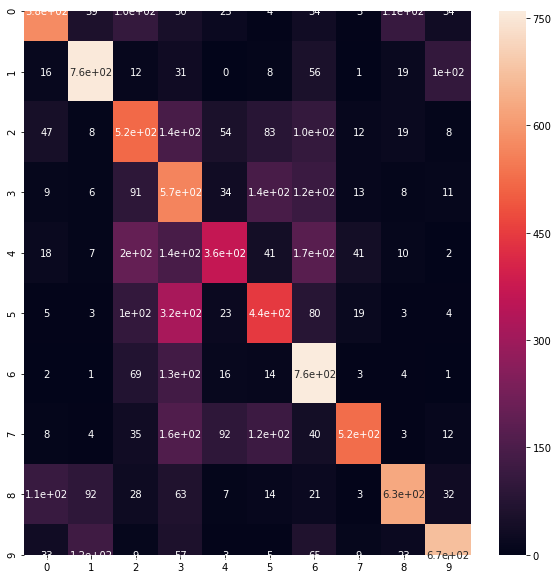

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

### Saving the model

In [27]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

### Image Augmentation
Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images.

Augmentations also include shifting and changing the brightness of the images.

In [ ]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train.shape

In [ ]:
n = 8 
X_train_sample = X_train[:n]
X_train_sample.shape

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(X_train_sample)

In [ ]:
pip install scipy==1.1.0

In [ ]:
from scipy.misc import toimage

fig = plt.figure(figsize = (20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(toimage(x_batch[i]))
     fig.suptitle('Augmented images (rotated 90 degrees)')
     plt.show()
     break;


### Model Training using Augmented Images

In [28]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [29]:
datagen.fit(X_train)

In [30]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

Epoch 1/2
1563/1563 [==============================] - 214s 137ms/step - loss: 1.7467 - accuracy: 0.3724
Epoch 2/2
1563/1563 [==============================] - 179s 115ms/step - loss: 1.6403 - accuracy: 0.4134


In [31]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

ValueError: Error when checking target: expected dense_3 to have shape (10,) but got array with shape (1,)

In [32]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)